## Initialize

> **Note**: This calculation does not support `jax`. *[jan25]*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import numpy as np
import os
from classy_sz import Class as Class_sz

**Cosmological parameters**

In [2]:
h               = 0.6711#float( configParser['top']['h']) #0.6711
dOmega0         = 0.3175# float(configParser['top']['dOmega0'])#0.3175
dOmegaDE        = 1-dOmega0# 0.6825
w0              =  -1.
dSigma8         = 0.834#float(configParser['top']['dSigma8'])#0.834
dSpectral       = 0.9624#float(configParser['top']['dSpectral'])#0.9624#calculate results for these parameters
ombh2 = 0.049*h**2
dOmegaB= ombh2/h**2
print(h,dOmega0,dOmegaDE,w0,dSigma8,dSpectral)
(dOmega0-dOmegaB)*h**2

0.6711 0.3175 0.6825 -1.0 0.834 0.9624


0.12092574388500002

In [3]:
cosmo_params= {
    'omega_b': ombh2,
    'omega_cdm':  (dOmega0-dOmegaB)*h**2,
    'H0': 100.*h, 
    'tau_reio': 0.06,  # doesnt matter
    # 'ln10^{10}A_s': 3.047,
    'sigma8': dSigma8,
    'n_s': dSpectral, 
    "cosmo_model": 0, # 1: use mnu-lcdm emulators; 0: use lcdm with fixed neutrino mass, currently vrms2 does not support emulators

}

**Precision parameters**

In [4]:
precision_params = {
## check k_min_for_pk_in_vrms2,... if needed
}

## Compute

In [21]:
%%time

zmin = 0.
zmax = 5.

z_for_pk_hm =  2. 

Lbox = 1000;

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({
'output': 'tau_tau_1h,tau_tau_2h,tau_tau_hf,mPk,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h',

'z_min' : zmin,
'z_max' : zmax,
'ndim_redshifts': 150,

'dlogell' : 0.1,
'ell_max' : 10000.0,
'ell_min' : 2.0,

        
'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.001,

'gas_profile' : 'NFW', # set NFW profile
'delta for electron density':"200c", 
'x_out_truncated_density_profile_electrons': 1.,
'normalize_gas_density_profile' : 0,
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-5,
"k_max_for_pk_hm" : 5e1,

    
'n_k_density_profile' : 200, # default 80
'n_m_density_profile' : 150, # default= 100 decrease for faster
'n_z_density_profile' : 150, # default= 100 decrease for faster
'k_min_gas_density_profile' : 1e-8,
'k_max_gas_density_profile' : 1e6,

'hm_consistency': 1,
'mass_function' : 'T08M200c',
'non_linear' : 'hmcode',

"kmin_cut":-2*np.pi/(Lbox/h)
    
})
classy_sz.compute_class_szfast() 
# classy_sz.compute()

/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/IPython/core/magics/execution.py:1330: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  out = eval(code_2, glob, local_ns)
/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


CPU times: user 20.6 s, sys: 1.5 s, total: 22.1 s
Wall time: 3.16 s


In [22]:
classy_sz.sigma8()

0.8340000000000003

In [23]:
import scipy
scipy.constants.physical_constants['Thomson cross section'][0]

6.6524587321e-29

In [24]:
# classy_sz.cl_ee(

In [25]:
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

l = np.asarray(classy_sz.cl_ee()['ell'])
cl_ee_1h = np.asarray(classy_sz.cl_ee()['1h'])/l_to_dl(l)
cl_ee_2h = np.asarray(classy_sz.cl_ee()['2h'])/l_to_dl(l)
cl_ee_hf = np.asarray(classy_sz.cl_ee()['hf'])/l_to_dl(l)


## emulators

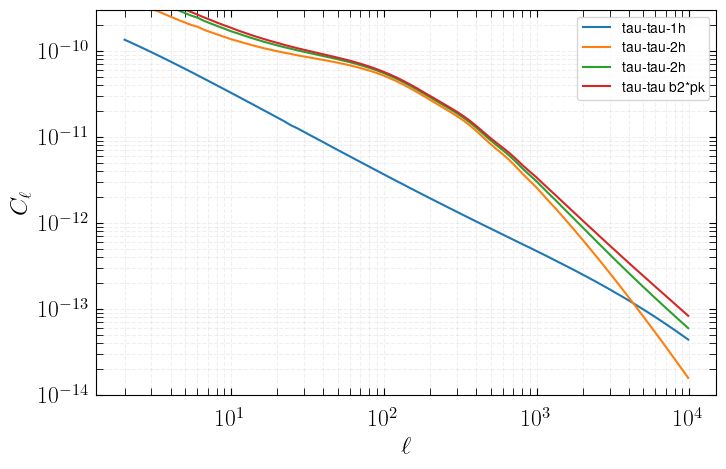

In [26]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$C_{\ell}$",size=title_size) 

plt.plot(l,cl_ee_1h,label='tau-tau-1h')
plt.plot(l,cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_1h+cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_hf,label='tau-tau b2*pk')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-14,3e-10)
ax.legend()

## no kcut

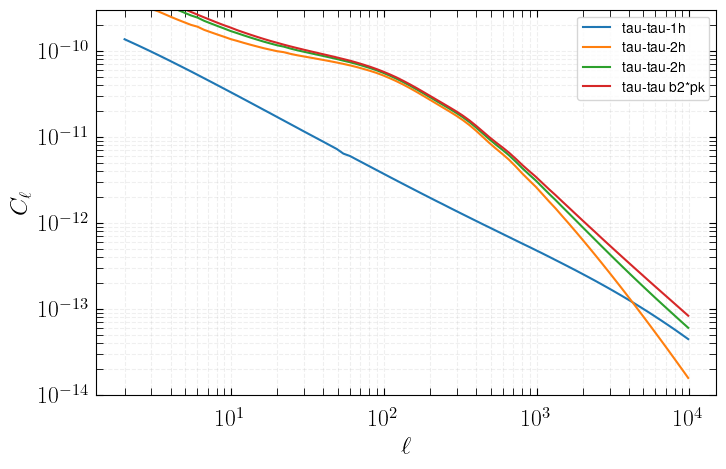

In [20]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$C_{\ell}$",size=title_size) 

plt.plot(l,cl_ee_1h,label='tau-tau-1h')
plt.plot(l,cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_1h+cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_hf,label='tau-tau b2*pk')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-14,3e-10)
ax.legend()

## kcut

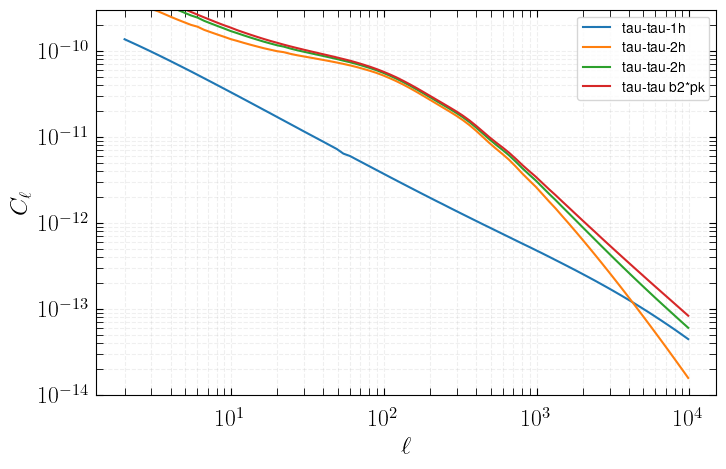

In [20]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$C_{\ell}$",size=title_size) 

plt.plot(l,cl_ee_1h,label='tau-tau-1h')
plt.plot(l,cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_1h+cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_hf,label='tau-tau b2*pk')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-14,3e-10)
ax.legend()

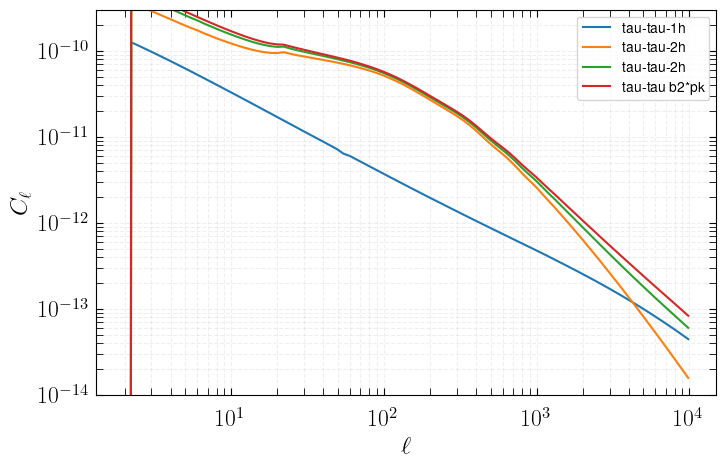

In [14]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$C_{\ell}$",size=title_size) 

plt.plot(l,cl_ee_1h,label='tau-tau-1h')
plt.plot(l,cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_1h+cl_ee_2h,label='tau-tau-2h')
plt.plot(l,cl_ee_hf,label='tau-tau b2*pk')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-14,3e-10)
ax.legend()

In [11]:
pk_bb_at_z_hm_nfw = classy_sz.pk_bb_at_z_hm()
pk_at_z_hm = classy_sz.pk_at_z_hm()
pknl_at_z_class = np.vectorize(classy_sz.pk)

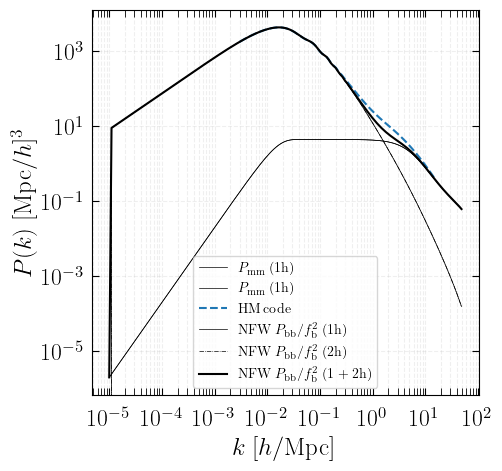

In [12]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = r'$P_\mathrm{mm}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = r'$P_\mathrm{mm}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)

k_arr = np.geomspace(2e-3,1e1,100)
ax.plot(k_arr/classy_sz.h(),pknl_at_z_class(k_arr,z_for_pk_hm)*classy_sz.h()**3.,label=r'$\mathrm{HM\,code}$',ls='--')



ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['1h'])*classy_sz.get_f_b()**-2.,label = r'$\mathrm{NFW}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['2h'])*classy_sz.get_f_b()**-2.,label = r'$\mathrm{NFW}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_nfw['k'],(np.asarray(pk_bb_at_z_hm_nfw['1h'])+np.asarray(pk_bb_at_z_hm_nfw['2h']))*classy_sz.get_f_b()**-2.,label = r'$\mathrm{NFW}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='k',ls='-')


ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()